In [131]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from statistics import mode
import re

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

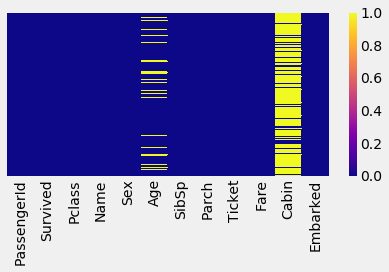

In [33]:
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')

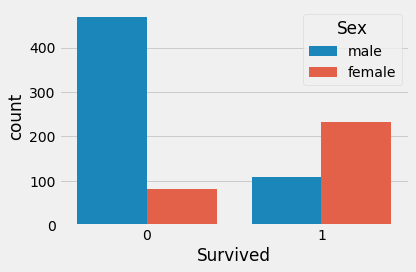

In [34]:
sns.countplot(x="Survived", hue="Sex", data=train)
plt.tight_layout()

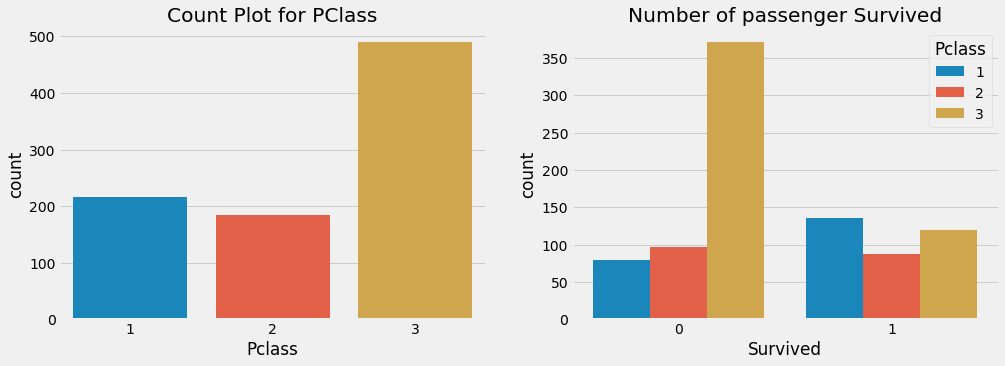

In [30]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['Pclass'])
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Number of passenger Survived');

In [18]:
pclass1 = train[train.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = train[train.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = train[train.Pclass == 3]['Survived'].value_counts(normalize=True).values[1]*100

print("Lets look at some satistical data!\n")
print("Pclaas-1: {:.1f}% People Survived".format(pclass1))
print("Pclaas-2: {:.1f}% People Survived".format(pclass2))
print("Pclaas-3: {:.1f}% People Survived".format(pclass3))

Lets look at some satistical data!

Pclaas-1: 63.0% People Survived
Pclaas-2: 47.3% People Survived
Pclaas-3: 24.2% People Survived


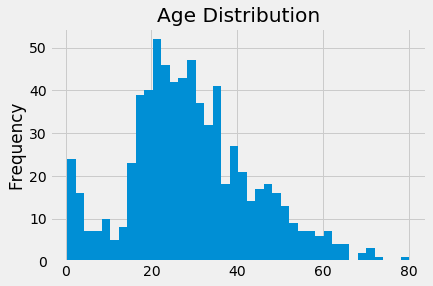

In [22]:
train['Age'].hist(bins=40)
plt.title('Age Distribution');

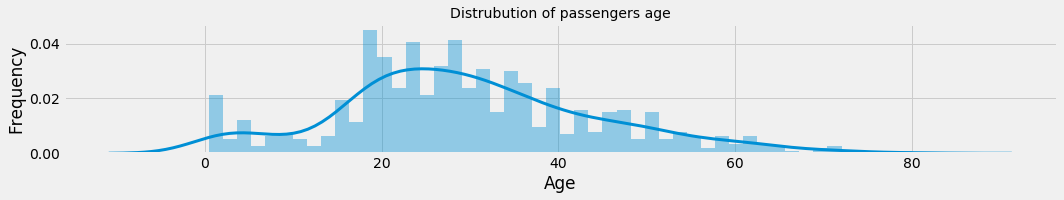

In [28]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(train[(train["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

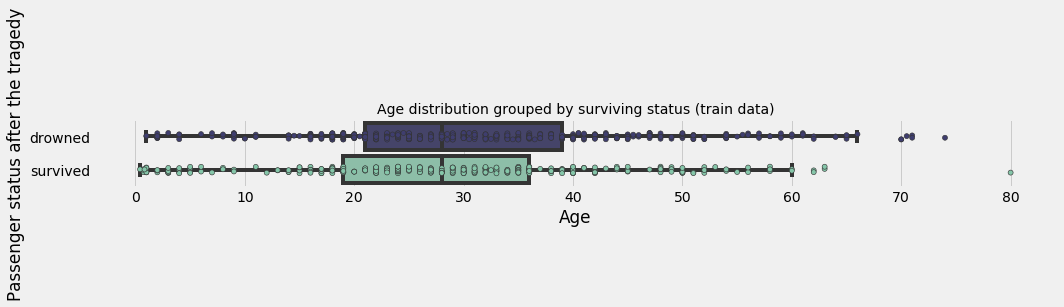

In [42]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = train,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = train,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

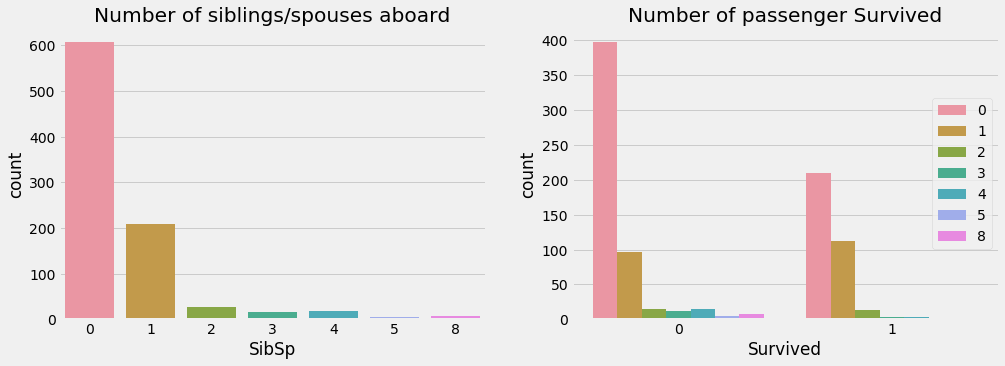

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['SibSp'])
plt.title('Number of siblings/spouses aboard');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="SibSp", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived');

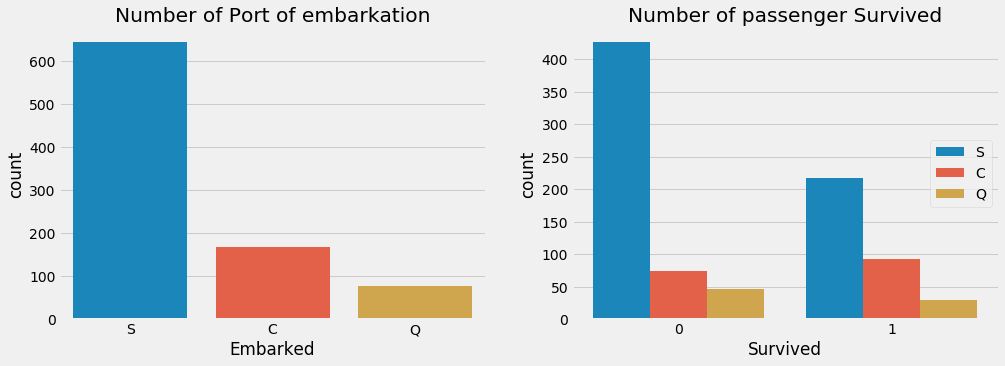

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['Embarked'])
plt.title('Number of Port of embarkation');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Embarked", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived');

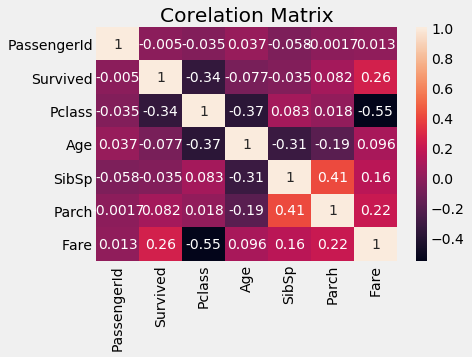

In [59]:
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

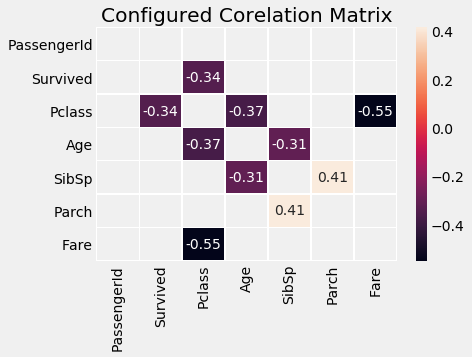

In [62]:
corr = train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');

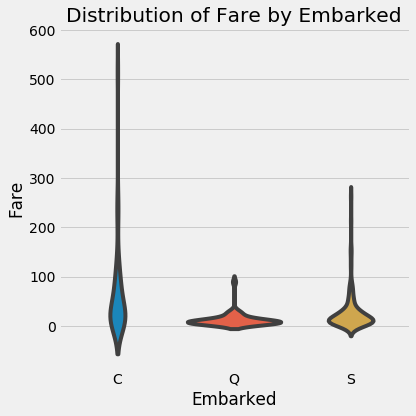

In [91]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=train, height = 6, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

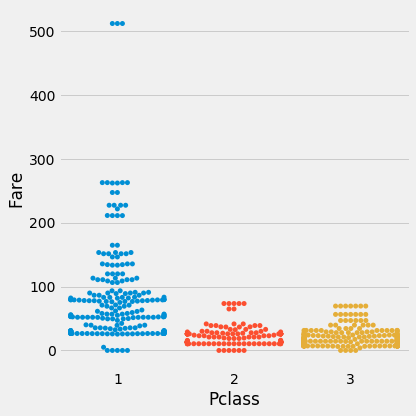

In [92]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=train, height = 6)

plt.tight_layout()

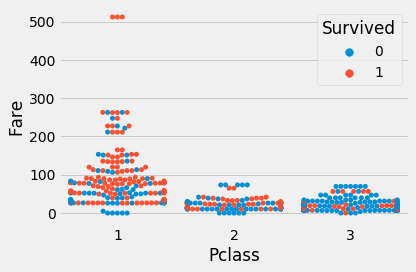

In [97]:
sns.swarmplot(x="Pclass", y="Fare", data=train,hue = "Survived",)

plt.tight_layout()

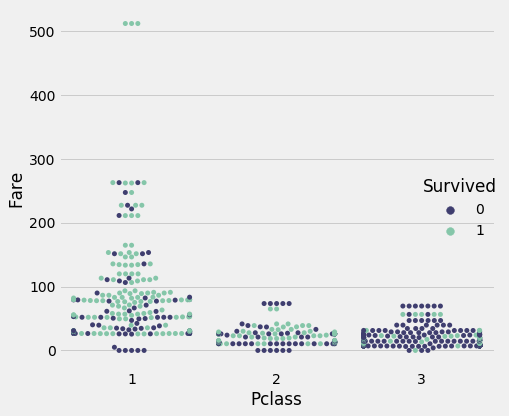

In [96]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=train, 
                                    palette=["#3f3e6fd1", "#85c6a9"], height = 6)
plt.tight_layout()

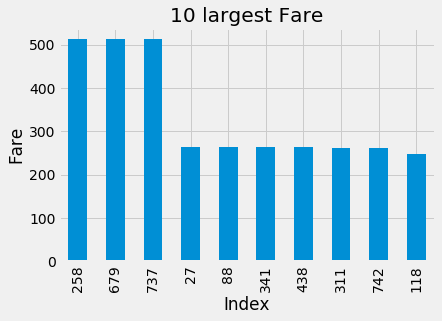

In [101]:
train['Fare'].nlargest(10).plot(kind='bar', title = '10 largest Fare', color = ['#C62D42', '#FE6F5E']);
plt.xlabel('Index')
plt.ylabel('Fare');

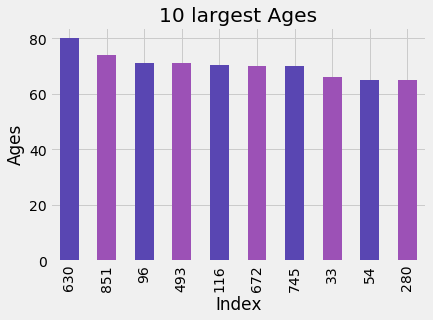

In [99]:
train['Age'].nlargest(10).plot(kind='bar', color = ['#5946B2','#9C51B6']);
plt.title('10 largest Ages')
plt.xlabel('Index')
plt.ylabel('Ages');

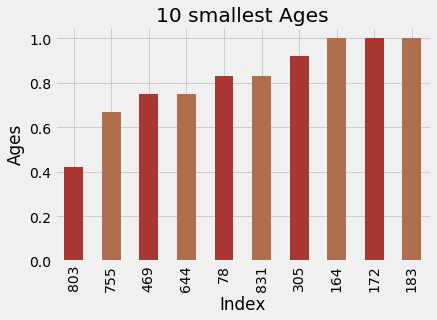

In [100]:
train['Age'].nsmallest(10).plot(kind='bar', color = ['#A83731','#AF6E4D'])
plt.title('10 smallest Ages')
plt.xlabel('Index')
plt.ylabel('Ages');

In [107]:
train.isnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [105]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

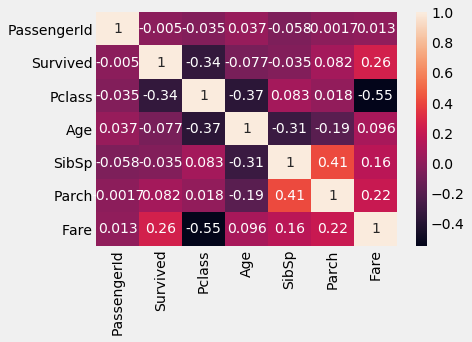

In [108]:
sns.heatmap(train.corr(), annot=True)

In [109]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('median')

In [116]:
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))

#Applying the same technique for test set
test['Embarked'] = test['Embarked'].fillna(mode(test['Embarked']))

In [117]:
train['Fare']  = train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
test['Fare']  = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [118]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
              ..
C86            1
B42            1
B86            1
A23            1
C104           1
Name: Cabin, Length: 147, dtype: int64

In [122]:
train[train['Cabin'] == 'C23 C25 C27']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [123]:
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

In [124]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1

test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1

/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the

In [127]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
test.drop(columns='Embarked', inplace=True)

In [128]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Q'],
      dtype='object')

In [129]:
train.Cabin.tolist()[0:20]

['U',
 'C85',
 'U',
 'C123',
 'U',
 'U',
 'E46',
 'U',
 'U',
 'U',
 'G6',
 'C103',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U']

In [132]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

In [135]:
train['Name'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [136]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [137]:
train['Title'].value_counts(normalize = True) * 100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

In [138]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

In [139]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

In [156]:
train.groupby('familySize')['Survived'].value_counts(normalize = True).unstack()

Survived,0,1
familySize,,
1,0.696462,0.303538
2,0.447205,0.552795
3,0.421569,0.578431
4,0.275862,0.724138
5,0.800000,0.200000
6,0.863636,0.136364
7,0.666667,0.333333
8,1.000000,NaN
11,1.000000,NaN


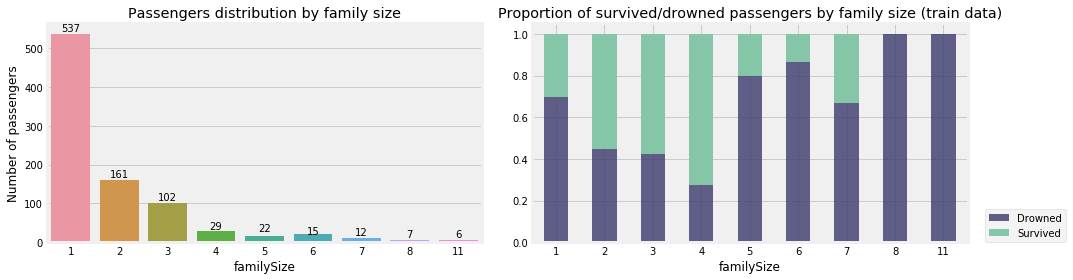

In [151]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(train['familySize'], ax = ax1)

# calculate passengers for each category
labels = (train['familySize'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = train.groupby('familySize')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

In [141]:
# Drop redundant features
train = train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [142]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)

In [158]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))

R-Squared for Train set: 0.460
R-Squared for test set: 0.374


In [159]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, C=50)
logreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test, y_test)))

R-Squared for Train set: 0.848
R-Squared for test set: 0.804


In [160]:
print(logreg.intercept_)
print(logreg.coef_)

[2.4255875]
[[-1.04608681e+00  4.25060277e+00 -4.09216098e-02  2.79584102e-03
  -8.31626923e-02  7.68843764e-01  6.88448253e-01  4.55618634e-01
   3.35724183e+00 -1.39135569e+00 -6.92394644e-02 -1.18810938e-01
   1.35074911e-01 -4.79812895e-01]]


In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [162]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scaled, y_test)))

R-Squared for Train set: 0.850
R-Squared for test set: 0.804


In [163]:
from sklearn.neighbors import KNeighborsClassifier

knnclf = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
knnclf.fit(X_train, y_train)
y_pred = knnclf.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7262569832402235


In [165]:
knnclf = KNeighborsClassifier(n_neighbors=7)

# Train the model using the scaled training sets
knnclf.fit(X_train_scaled, y_train)
y_pred = knnclf.predict(X_test_scaled)

In [166]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


In [167]:
from sklearn.svm import LinearSVC

svmclf = LinearSVC(C=50)
svmclf.fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svmclf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svmclf.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.82
Accuracy of Linear SVC classifier on test set: 0.79


/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [168]:
svmclf = LinearSVC()
svmclf.fit(X_train_scaled, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svmclf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svmclf.score(X_test_scaled, y_test)))

Accuracy of Linear SVC classifier on training set: 0.85
Accuracy of Linear SVC classifier on test set: 0.80


In [169]:
from sklearn.svm import SVC

svcclf = SVC(gamma=0.1)
svcclf.fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svcclf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svcclf.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.70


In [170]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtclf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtclf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on test set: 0.79


In [171]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(random_state=2)

In [172]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [173]:
from sklearn.model_selection import 
 

randomForest_CV = GridSearchCV(estimator = rfclf, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [174]:
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [175]:
rf_clf = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 100)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [176]:
predictions = rf_clf.predict(X_test)

In [177]:
#Linear Model
print("Linear Model R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("Linear Model R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))
print()

#Logistic Regression
print("Logistic Regression R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Logistic Regression R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scaled, y_test)))
print()

#KNN Classifier
print("KNN Classifier Accuracy:",accuracy_score(y_test, y_pred))
print()

#SVM
print('SVM Accuracy on training set: {:.2f}'
     .format(svmclf.score(X_train_scaled, y_train)))
print('SVM Accuracy on test set: {:.2f}'
     .format(svmclf.score(X_test_scaled, y_test)))
print()

#Kerelize SVM
print('SVC Accuracy on training set: {:.2f}'
     .format(svcclf.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.2f}'
     .format(svcclf.score(X_test_scaled, y_test)))
print()

#Decision Tree
print('Accuracy of Decision Tree on training set: {:.2f}'
     .format(dtclf.score(X_train, y_train)))
print('Accuracy of Decision Tree on test set: {:.2f}'
     .format(dtclf.score(X_test, y_test)))
print()

#Random Forest
print('Random Forest Accuracy:{:.3f}'.format(accuracy_score(y_test, predictions) * 100))

Linear Model R-Squared for Train set: 0.460
Linear Model R-Squared for test set: 0.374

Logistic Regression R-Squared for Train set: 0.850
Logistic Regression R-Squared for test set: 0.804

KNN Classifier Accuracy: 0.7988826815642458

SVM Accuracy on training set: 0.85
SVM Accuracy on test set: 0.80

SVC Accuracy on training set: 0.37
Accuracy on test set: 0.44

Accuracy of Decision Tree on training set: 0.83
Accuracy of Decision Tree on test set: 0.79

Random Forest Accuracy:78.771
